# Lecture 16:  NetworkX and PageRank Algorithm

__Reading material:__
- https://networkx.github.io/documentation/stable/tutorial.html#creating-a-graph<br>
  Read from "Creating a graph" to "Directed graphs"
- https://en.wikipedia.org/wiki/PageRank

__Optional:__
- https://www.geeksforgeeks.org/page-rank-algorithm-implementation/

We can use the equilibrium distribution of users on the internet as an approximation for the relative popularity of web pages. We start with an adjacency matrix, __A__, of which the elements represent links between pages. If a page has a number of links to other pages, we assume that a user picks one of them uniformly at random and moves to the next page. However, internet users do not navigate the web only by following links. (If you end up on a page with no links on it, you do not get stuck there for the rest of your life.) Users also occasionally move between pages with no links on them. We call this teleportation, and to simulate it in our model, we simply add a small constant to every element of __A__. This will translate to their being a non-zero probability of moving between any pair of pages, whether or not there is a link.


Here is the detail of the PageRank algorithm<br>
$$PR_0(x) = \frac{1}{N}$$

$$PR_i(x) = \frac{1-\alpha}{N}+\alpha\sum_{y\rightarrow x}\frac{PR_{i-1}(y)}{out(y)}$$

- $PR_i(x)$: the PageRank of node $x$ at i-th iteration
- $\alpha$: a damping factor (we can set it to 0.85)
- $N$: the total number of nodes in the system
- $out(y)$: the number of outlinks of node $y$

### Graph visualization and PageRank in Networkx

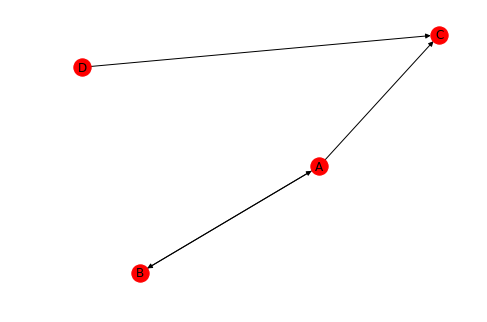

In [8]:
import matplotlib.pyplot as plt 
import networkx as nx
G = nx.DiGraph() #DiGraph means directed graph
G.add_nodes_from(['A', 'B', 'C','D']) # get nodes from a list of nodes
AB_edge = ['A','B']
#G.add_edge(AB_edge) #problem here! add-edge takes two argements!!
G.add_edge(*AB_edge) #unpack the content of AB_edge, equivalent to G.add_edge('A','B')
edge_list = [('A','C'),('B','A'),('D','C')]
G.add_edges_from(edge_list) #add_edge_from() takes the list of edges you wanna add
nx.draw(G,with_labels=True) #with_labels means if the nodes have name on them
plt.show()

{0: array([1.00000000e+00, 2.66236709e-08]), 1: array([0.809017  , 0.58778527]), 2: array([0.30901698, 0.95105656]), 3: array([-0.30901702,  0.9510565 ]), 4: array([-0.80901705,  0.58778521]), 5: array([-9.99999982e-01, -6.07991049e-08]), 6: array([-0.80901693, -0.58778533]), 7: array([-0.30901708, -0.95105645]), 8: array([ 0.30901713, -0.95105645]), 9: array([ 0.80901694, -0.58778527])}


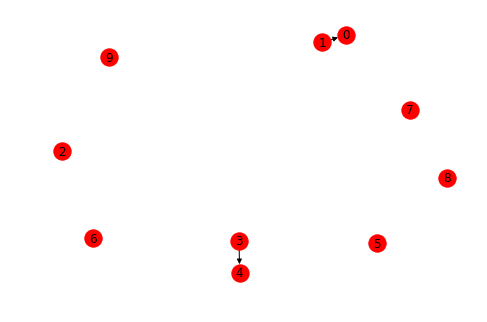

In [19]:
G = nx.DiGraph() #DiGraph means directed graph
nodes = range(10)
G.add_nodes_from(nodes)
G.add_edges_from([(1,0),(3,4)])
pos = nx.circular_layout(nodes)
print pos
nx.draw(G,pos,with_labels=True)
#nx.draw(G,with_labels=True) #without pos, the nodes will be randomly spreaded
plt.show()

{0: array([1.00000000e+00, 2.66236709e-08]), 1: array([0.809017  , 0.58778527]), 2: array([0.30901698, 0.95105656]), 3: array([-0.30901702,  0.9510565 ]), 4: array([-0.80901705,  0.58778521]), 5: array([-9.99999982e-01, -6.07991049e-08]), 6: array([-0.80901693, -0.58778533]), 7: array([-0.30901708, -0.95105645]), 8: array([ 0.30901713, -0.95105645]), 9: array([ 0.80901694, -0.58778527])}


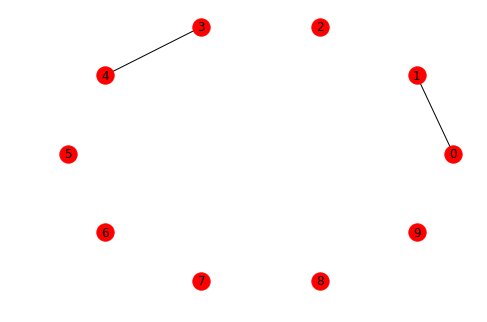

In [14]:
G = nx.Graph() #DiGraph means directed graph
nodes = range(10)
G.add_nodes_from(nodes)
G.add_edges_from([(1,0),(3,4)])
pos = nx.circular_layout(nodes)
print pos
nx.draw(G,pos,with_labels=True)
plt.show()
#the graph does NOT have directed edge

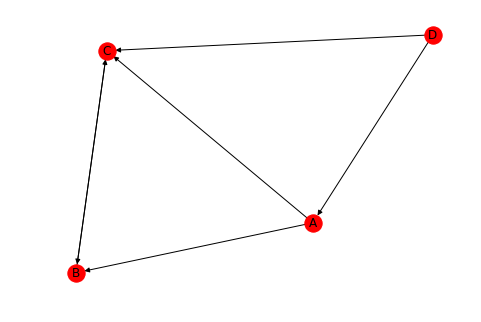

In [20]:
import matplotlib.pyplot as plt 
import networkx as nx
G = nx.DiGraph() #DiGraph means directed graph
G.add_nodes_from(['A', 'B', 'C','D']) # get nodes from a list of nodes
G.add_edge('A', 'C')
G.add_edge('B', 'C')
G.add_edge('C', 'B')
G.add_edge('A', 'B')
G.add_edge('D', 'A')
G.add_edge('D', 'C')
nx.draw(G,with_labels=True)
plt.show()

In [21]:
pr = nx.pagerank(G, alpha=0.85) # the default damping parameter alpha = 0.85
print pr

{'A': 0.053437500000000006, 'C': 0.458837771168547, 'B': 0.4502247288314527, 'D': 0.037500000000000006}


In [ ]:
# The following code is a simplified version of the function 
# which has been implemented in the networkx library.

def pagerank(G, alpha=0.85,
             max_iter=100, tol=1.0e-6, weight='weight'):    
    if len(G) == 0:
        return {}
 
    # Create a copy in (right) stochastic form
    W = nx.stochastic_graph(G, weight=weight)
    N = W.number_of_nodes()
 
    # Choose fixed starting vector
    x = dict.fromkeys(W, 1.0 / N)

    # Assign uniform personalization vector if not given
    p = dict.fromkeys(W, 1.0 / N)

    dangling_weights = p
    dangling_nodes = [n for n in W if W.out_degree(n, weight=weight) == 0.0]
 
    # power iteration: make up to max_iter iterations
    for _ in range(max_iter):
        xlast = x
        x = dict.fromkeys(xlast.keys(), 0)
        danglesum = alpha * sum(xlast[n] for n in dangling_nodes)
        for n in x:
            # this matrix multiply looks odd because it is
            # doing a left multiply x^T=xlast^T*W
            for nbr in W[n]:
                x[nbr] += alpha * xlast[n] * W[n][nbr][weight]
            x[n] += danglesum * dangling_weights[n] + (1.0 - alpha) * p[n]
 
        # check convergence, l1 norm
        err = sum([abs(x[n] - xlast[n]) for n in x])
        if err < N*tol:
            return x
    raise NetworkXError('pagerank: power iteration failed to converge '
                        'in %d iterations.' % max_iter)

In [ ]:
W = nx.stochastic_graph(G, weight='weight')
print W['A']
print W['B']
print W['C']
print W['D']